DVC Initialized

In [3]:
!dvc init -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [4]:
%%bash

git add .
git commit -m "Initialize DVC"

[master (root-commit) ae66e54] Initialize DVC
 10 files changed, 534 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvc/plots/confusion.json
 create mode 100644 .dvc/plots/confusion_normalized.json
 create mode 100644 .dvc/plots/linear.json
 create mode 100644 .dvc/plots/scatter.json
 create mode 100644 .dvc/plots/simple.json
 create mode 100644 .dvc/plots/smooth.json
 create mode 100644 .dvcignore
 create mode 100644 tut101.ipynb


Files and Directories

In [2]:
!ls -a .dvc 

.  ..  .gitignore  cache  config  plots  tmp


In [3]:
!cat .dvc/.gitignore

/config.local
/tmp
/cache


Control versions of data

In [7]:
# Get data 
!wget -P data/ https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
!du -sh data/*

--2021-11-28 15:28:03--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘data/iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2021-11-28 15:28:03 (13.5 MB/s) - ‘data/iris.csv’ saved [3716/3716]

4.0K	data/iris.csv


In [4]:
# Look on data

import pandas as pd

df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Add file under DVC control

In [9]:
%%bash

dvc add data/iris.csv
du -sh data/*


To track the changes with git, run:

	git add data/.gitignore data/iris.csv.dvc
4.0K	data/iris.csv
4.0K	data/iris.csv.dvc


In [5]:
!git status -s data/

 M data/.gitignore
 M data/iris.csv.dvc


In [11]:
%%bash

git add .
git commit -m "Add a source dataset"

[master c9f1fe0] Add a source dataset
 3 files changed, 119 insertions(+), 1 deletion(-)
 create mode 100644 data/.gitignore
 create mode 100644 data/iris.csv.dvc


What is DVC-file?
If you take a look at the DVC-file, you will see that only outputs are defined in outs. In this file, only one output is defined. The output contains the data file path in the repository and md5 cache. This md5 cache determines a location of the actual content file in DVC cache directory .dvc/cache
Output from DVC-files defines the relationship between the data file path in a repository and the path in a cache directory. See also DVC File Format

In [12]:
!cat data/iris.csv.dvc
!du -sh .dvc/cache/*/*

outs:
- md5: 57fce90c81521889c736445f058c4838
  size: 3716
  path: iris.csv
4.0K	.dvc/cache/57/fce90c81521889c736445f058c4838


Create ML pipeline

Stages:
    extract features
    split dataset
    train
    evaluate
Add feature extraction stage

In [15]:
!dvc run -n stage_feature_extraction \
    -d src/featurization.py -d data/iris.csv \
    -o data/iris_featurized.csv \
    python src/featurization.py

Running stage 'stage_feature_extraction':
> python src/featurization.py
Creating 'dvc.yaml'
Adding stage 'stage_feature_extraction' in 'dvc.yaml'
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add data/.gitignore dvc.yaml dvc.lock


In [19]:
!ls 
!cat dvc.yaml
!cat dvc.lock

data  dvc.lock	dvc.yaml  src  tut101.ipynb
stages:
  stage_feature_extraction:
    cmd: python src/featurization.py
    deps:
    - data/iris.csv
    - src/featurization.py
    outs:
    - data/iris_featurized.csv
schema: '2.0'
stages:
  stage_feature_extraction:
    cmd: python src/featurization.py
    deps:
    - path: data/iris.csv
      md5: 57fce90c81521889c736445f058c4838
      size: 3716
    - path: src/featurization.py
      md5: ab56a80d6d099f393c29577d0287be0b
      size: 515
    outs:
    - path: data/iris_featurized.csv
      md5: 04ed69383af337e9dabf934cbc8abc11
      size: 3858


In [7]:
features = pd.read_csv('data/iris_featurized.csv')
features.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
!git status -s

 M data/.gitignore
 M data/iris.csv.dvc
 M dvc.lock
 M dvc.yaml
 M src/split_dataset.py
 M tut101.ipynb
?? params.yaml
?? src/__init__.py


In [22]:
%%bash
git add .
git commit -m "Add stage_features_extraction"

[master 481b28e] Add stage_features_extraction
 8 files changed, 421 insertions(+), 3 deletions(-)
 create mode 100644 dvc.lock
 create mode 100644 dvc.yaml
 create mode 100644 src/evaluate.py
 create mode 100644 src/featurization.py
 create mode 100644 src/split_dataset.py
 create mode 100644 src/train.py


In [31]:
!dvc run -n stage_split_dataset \
    -p stage_split_dataset.test_size \
    -d src/split_dataset.py -d data/iris_featurized.csv \
    -o data/train.csv \
    -o data/test.csv \
    python src/split_dataset.py

Running stage 'stage_split_dataset':
> python src/split_dataset.py
Adding stage 'stage_split_dataset' in 'dvc.yaml'
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add data/.gitignore dvc.yaml dvc.lock


In [9]:
!cat dvc.yaml

stages:
  stage_feature_extraction:
    cmd: python src/featurization.py
    deps:
    - data/iris.csv
    - src/featurization.py
    outs:
    - data/iris_featurized.csv
  stage_split_dataset:
    cmd: python src/split_dataset.py
    deps:
    - data/iris_featurized.csv
    - src/split_dataset.py
    params:
    - stage_split_dataset.test_size
    outs:
    - data/test.csv
    - data/train.csv


Add train stage

In [28]:
!dvc run -n stage_train \
    -d src/train.py \
    -d data/train.csv \
    -o data/model.joblib \
    python src/train.py

Running stage 'stage_train':
> python src/train.py
Adding stage 'stage_train' in 'dvc.yaml'
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add dvc.lock dvc.yaml data/.gitignore


In [29]:
!git add dvc.lock dvc.yaml data/.gitignore

Add evaluate stage

In [31]:
!dvc run -n stage_evaluate \
    -d src/train.py \
    -d src/evaluate.py \
    -d data/test.csv \
    -d data/model.joblib \
    -m data/eval.txt \
    python src/evaluate.py

Running stage 'stage_evaluate':
> python src/evaluate.py
Adding stage 'stage_evaluate' in 'dvc.yaml'
Updating lock file 'dvc.lock'

To track the changes with git, run:

	git add dvc.lock data/.gitignore dvc.yaml


In [32]:
!git add dvc.lock data/.gitignore dvc.yaml

In [30]:
!dvc dag

    +-------------------+    
    | data/iris.csv.dvc |    
    +-------------------+    
              *              
              *              
              *              
+--------------------------+ 
| stage_feature_extraction | 
+--------------------------+ 
              *              
              *              
              *              
  +---------------------+    
  | stage_split_dataset |    
  +---------------------+    
              *              
              *              
              *              
      +-------------+        
      | stage_train |        
      +-------------+        


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

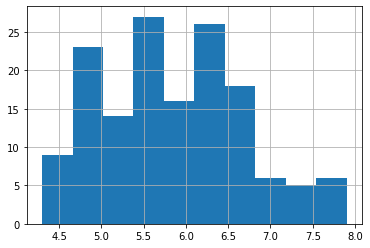

In [20]:
df['sepal_length'].hist()

<AxesSubplot:>

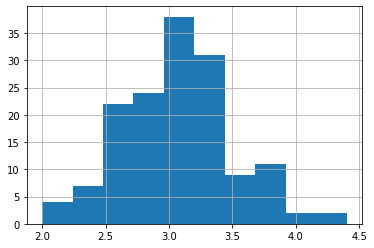

In [21]:
df['sepal_width'].hist()

<AxesSubplot:>

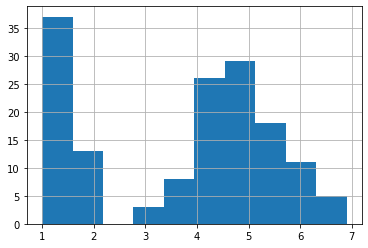

In [22]:
df['petal_length'].hist()

<AxesSubplot:>

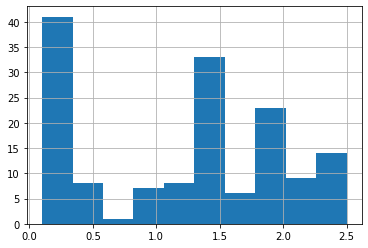

In [23]:
df['petal_width'].hist()

<AxesSubplot:>

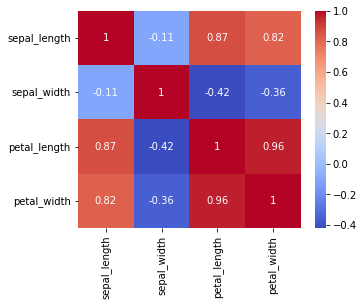

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
